C:\Users\ahuang\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:66: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


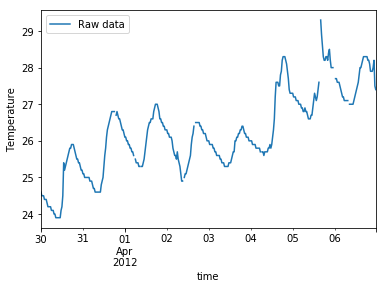

In [1]:
"""
Pandas Moving Average
---------------------

In this exercise, you will use Pandas to compute and plot the moving
average of a time series.  The file 'data.txt' contains measurements
from a lake, recorded every half hour.  There are missing data points
scattered throughout the data set.

*Note.*  The index in the DataFrame created below contains timestamps,
but no special time series features will be used, so it is not necessary
to have covered Pandas time series before doing this exercise.

0. Use pandas.read_table() to read the data from the file 'data.txt'
   into a Pandas DataFrame.  The columns in the DataFrame are 'temp'
   (temperature), 'sal' (salinity), 'ph' and 'depth'.  Plot the temperature.
   (Part 0 is done for you below.)

1. Use .rolling(...).mean() to compute and plot the moving average of the
   temperature using a window of 12 hours.  (Note that the sample period of the
   data is a half hour, so 12 hours corresponds to a window of 24 samples.)
   Then do the same for windows of 24 and 48 hours.

   *Hint:* Use the `min_periods` argument to specify that at least 12
   samples are needed in a window.  What happens if you do not
   specify `min_periods`?

2. Add a plot of the exponentially weighted moving average to the plot
   created in part 1.  The function to compute this is pandas.ewma().
   If `x` is the input series, the exponentially weighted moving
   average is the time series `y` where::

       y[0] = x[0]
       y[k] = alpha * x[k] + (1 - alpha) * y[k - 1]  for k > 0.

   So the output at time `k` is a weighted combination of the input
   at time `k` and the output at time `k` - 1.

   The parameter `alpha` is not given directly.  Instead, `span` is
   given, where::

       alpha = 2 / (span + 1)

   Experiment with different values of `span`.  (You can also use the
   keyword argument `com`, where `alpha = 1 / (com + 1)`.)

See :ref:`pandas-moving-average-solution`.

"""

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


# 0.

# To parse the time field of the file, we use the following
# timestamp format:
fmt = "%Y%j+%H%M"

df = pd.read_table('hw4_files/data.txt', sep='\\s+', skiprows=22, skipfooter=1,
                   names=['time', 'temp', 'sal', 'ph', 'depth'],
                   parse_dates=True,
                   date_parser=lambda s: datetime.strptime(s, fmt),
                   index_col=0)

temp = df['temp']

temp.plot(label='Raw data')


# 1.


# 2.


# ---
plt.legend(loc='best')
plt.ylabel('Temperature')
plt.show()

In [497]:
"""
Wind Statistics
----------------

This exercise is an alternative version of the Numpy exercise but this time we
will be using pandas for all tasks. The data have been modified to contain some
missing values, identified by NaN.  Using pandas should make this exercise
easier, in particular for the bonus question.


Of course, you should be able to perform all of these operations without using
a for loop or other looping construct.


Topics: Pandas, time-series

1. The data in 'wind.data' has the following format::

        Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
        61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.

   Use the 'pd.read_table' function from pandas to read the data into
   a DataFrame.

2. Replace the first 3 columns by a proper datetime index.

3. Compute how many values are missing for each location over the entire
   record.  They should be ignored in all calculations below. Compute how many
   non-missing values there are in total.

4. Calculate the mean windspeeds of the windspeeds over all the locations and
   all the times (a single number for the entire dataset).

5. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)

6. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)

7. Find the average windspeed in January for each location.  Treat
   January 1961 and January 1962 both as January.

8. Downsample the record to a yearly, monthly and weekly frequency
   for each location.

9. Plot the time series and a box plot of the monthly data for each location.

Bonus
~~~~~

10. Calculate the mean windspeed for each month in the dataset.  Treat
    January 1961 and January 1962 as *different* months.

11. Calculate the min, max and mean windspeeds and standard deviations of the
    windspeeds across all locations for each week (assume that the first week
    starts on January 1 1961) for the first 52 weeks.

Notes
~~~~~

This solution has been tested with Pandas version 0.14.1.

The original data from which these were derived were analyzed in detail in the
following article:

   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.


See :ref:`pandas-wind-statistics-solution`.

"""

from matplotlib import pyplot as plt
import pandas as pd

In [498]:
'''
1. The data in 'wind.data' has the following format::

        Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
        61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.

   Use the 'pd.read_table' function from pandas to read the data into
   a DataFrame.
'''

df = pd.read_table('hw4_files/wind.data',sep='\\s+') 
df.head(3) # print first three rows for verification

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [533]:
'''
2. Replace the first 3 columns by a proper datetime index.
'''
import datetime

df_truncated = df.get(['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL'])

def getDateTime(entry):
  return datetime.datetime(1900+df['Yr'][entry],df['Mo'][entry],df['Dy'][entry])

dateTimeColumn = pd.Series(map(getDateTime,range(len(df))))

df = pd.concat([pd.DataFrame({'dtObject':dateTimeColumn}),df_truncated], axis=1)
df.head(3)

KeyError: 'Yr'

In [547]:
df = pd.read_table('hw4_files/wind.data', sep='\\s+',
                   parse_dates=[[0,1,2]],
                   date_parser=lambda s: '19'+s, index_col=0, skiprows=0, skipfooter=0)
df.head(3)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


In [548]:
"""
3. Compute how many values are missing for each location over the entire
   record.  They should be ignored in all calculations below. Compute how many
   non-missing values there are in total.
"""

import numpy
def determineIfNaN(object):
    if str(type(object)) == "<class 'pandas.tslib.Timestamp'>":
        return False
    else:
        return numpy.isnan(object)
    
f = df.applymap(determineIfNaN)
numNaN = sum(f.sum())

numNonNaN = f.size - numNaN

print('There are {0} NaN\'s in wind.data, and {1} entries of wind.data which are defined.'.format(numNaN,numNonNaN))

There are 31 NaN's in wind.data, and 78857 entries of wind.data which are defined.


In [549]:
'''
4. Calculate the mean windspeeds of the windspeeds over all the locations and
   all the times (a single number for the entire dataset).
'''

df.sum().sum()/df.count().sum()

# these are incorrect:
# df.mean().mean() # caution: this is not the same as the mean of the means!
# df.sum().sum()/df.size # this size collects NaN values as well, and isn't correct!

10.227883764282167

In [569]:
np.nanmean(df.values) # nanmean just ignores NaN's, rather than counting them as 0

10.227883764282179

In [550]:
'''
5. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)
'''

df_noDT = df.iloc[1:]

def flagMe(object):
    return 'result'

gb = df_noDT.groupby(flagMe)
gb.agg([min, max, numpy.std])

RPT                   VAL                   ROS                   \
         min   max       std   min    max       std  min    max       std   
result  0.67  35.8  5.618744  0.21  33.37  5.267488  1.5  33.84  5.008796   

        KIL   ...        MUL   CLO                    BEL                   \
        min   ...        std   min    max       std   min    max       std   
result  0.0   ...    4.16709  0.04  28.21  4.504044  0.13  42.38  5.835104   

         MAL                 
         min    max     std  
result  0.67  42.54  6.7003  

[1 rows x 36 columns]

In [551]:
pd.DataFrame({'min':df.iloc[1:].min(axis=0),'max':df.iloc[1:].max(axis=0),'std':df.iloc[1:].std(axis=0)},index=df.iloc[1:].axes[1])

,max,min,std
RPT,35.80,0.67,5.618744
VAL,33.37,0.21,5.267488
ROS,33.84,1.50,5.008796
KIL,28.46,0.00,3.605898
SHA,37.54,0.13,4.936125
BIR,26.16,0.00,3.968837
DUB,30.37,0.00,4.977704
CLA,31.08,0.00,4.499739
MUL,25.88,0.00,4.167090
CLO,28.21,0.04,4.504044


In [554]:
'''
6. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)
'''

dfTranspose = df.transpose()

def provideLocName(object):
    return 'All Locations'

gbTranspose = dfTranspose.groupby(provideLocName)

gbTranspose.agg([numpy.min,numpy.max,numpy.mean])

1961-01-01                  1961-01-02                    \
                    amin  amax       mean       amin   amax       mean   
All Locations       9.29  18.5  13.018182        6.5  17.54  11.336364   

              1961-01-03                  1961-01-04   ...    1978-12-28  \
                    amin  amax       mean       amin   ...          mean   
All Locations       6.17  18.5  11.641818       1.79   ...         15.15   

              1978-12-29               1978-12-30                 1978-12-31  \
                    amin   amax   mean       amin   amax     mean       amin   
All Locations       8.71  29.58  14.89       9.13  28.79  15.3675       9.59   

                               
                amax     mean  
All Locations  27.29  15.4025  

[1 rows x 19722 columns]

In [558]:
pd.DataFrame({'min':df.min(axis=1),'max':df.max(axis=1),'mean':df.mean(axis=1)})

,max,mean,min
Yr_Mo_Dy,,,
1961-01-01,18.50,13.018182,9.29
1961-01-02,17.54,11.336364,6.50
1961-01-03,18.50,11.641818,6.17
1961-01-04,11.75,6.619167,1.79
1961-01-05,13.33,10.630000,6.17
1961-01-06,13.21,8.240000,4.42
1961-01-07,14.29,10.385000,4.96
1961-01-08,16.62,10.487500,5.91
1961-01-09,15.37,9.897500,4.75


In [572]:
'''
7. Find the average windspeed in January for each location.  Treat
   January 1961 and January 1962 both as January.
'''

januaryData = df[df.index.month == 1]
januaryData.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [590]:
'''
8. Downsample the record to a yearly, monthly and weekly frequency
   for each location.
'''

df.resample('A').mean().head(3) # annual downsampling

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014


In [591]:
monthlyData = df.resample('M').mean().head(3) # monthly downsampling
monthlyData

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000


In [588]:
df.resample('W').mean().head(3) # weekly downsampling

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286


In [ ]:
'''
9. Plot the time series and a box plot of the monthly data for each location.
'''
%matplotlib notebook
import matplotlib.pyplot as plt
plt.close()

<IPython.core.display.Javascript object>


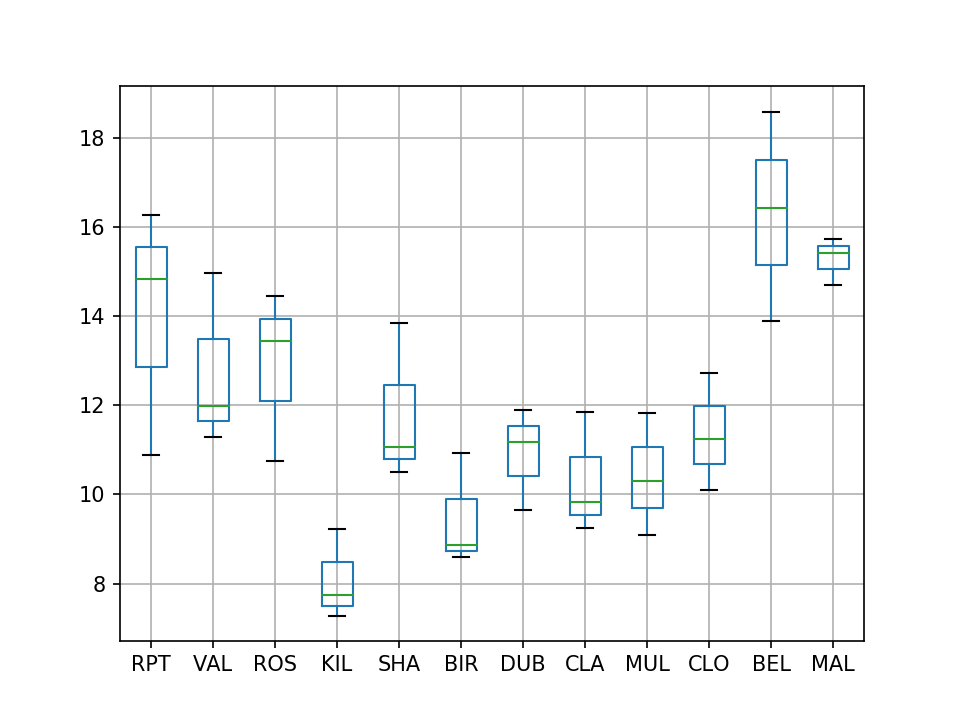

<IPython.core.display.Javascript object>


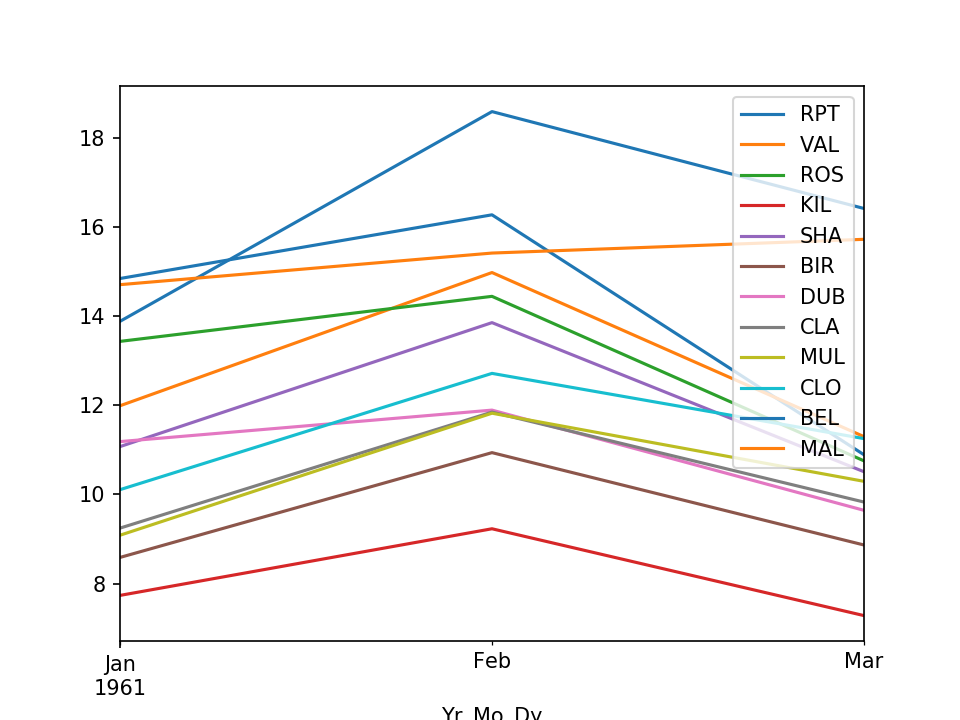

[]

In [597]:
monthlyData.boxplot()
monthlyData.plot()
plt.plot()


In [599]:
'''
Bonus
~~~~~

10. Calculate the mean windspeed for each month in the dataset.  Treat
    January 1961 and January 1962 as *different* months.
'''

year_month = lambda d: Period("{}-{}".format(d.year, d.month), freq='M')
unique_monthly_grouped = df.groupby(year_month)


NameError: global name 'Period' is not defined

In [ ]:
11. Calculate the min, max and mean windspeeds and standard deviations of the
    windspeeds across all locations for each week (assume that the first week
    starts on January 1 1961) for the first 52 weeks.